<a href="https://colab.research.google.com/github/YunSeoHwan/DNN_Study/blob/main/C3_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST (다중분류)**

# **데이터 살펴보기**

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

60000
10000


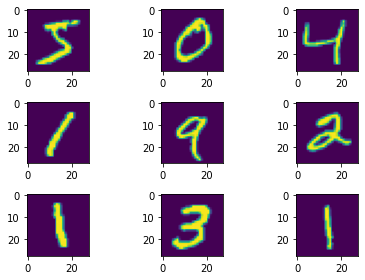

In [1]:
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

# data split
training_data = MNIST(root="./", train=True, download=True, transform=ToTensor())
test_data = MNIST("./", train=False, download=True, transform=ToTensor())

print(len(training_data))
print(len(test_data))

# img show
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(training_data.data[i])

plt.tight_layout()
plt.show()

# **Data Load**

In [2]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# **Model Training**

In [3]:
import torch
import torch.nn as nn

from torch.optim.adam import Adam

device = 'cpu'

model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

model.to(device)

# learning rate, optimazition
lr = 0.001
optim = Adam(model.parameters(), lr=lr)

for epoch in range(20):
    for data, label in train_loader:
        optim.zero_grad()

        # data transform
        data = torch.reshape(data, (-1, 784)).to(device)
        preds = model(data)

        # loss function
        loss = nn.CrossEntropyLoss()(preds, label)
        loss.backward()
        optim.step()
    
    print(f"epoch{epoch+1} loss : {loss.item()}")

torch.save(model.state_dict(), "MNIST.pth")

epoch1 loss : 0.1529330462217331
epoch2 loss : 0.1971024125814438
epoch3 loss : 0.11338352411985397
epoch4 loss : 0.02234799601137638
epoch5 loss : 0.005158592015504837
epoch6 loss : 0.005977182649075985
epoch7 loss : 0.0457562655210495
epoch8 loss : 0.013816234655678272
epoch9 loss : 0.0069040958769619465
epoch10 loss : 0.00837946031242609
epoch11 loss : 0.043691255152225494
epoch12 loss : 0.0034765955060720444
epoch13 loss : 0.007442881353199482
epoch14 loss : 0.01902681030333042
epoch15 loss : 0.0041098217479884624
epoch16 loss : 0.000507021090015769
epoch17 loss : 0.003153544384986162
epoch18 loss : 0.001744670094922185
epoch19 loss : 0.0005713864229619503
epoch20 loss : 0.00017904469859786332


# **Model Accuracy**

In [4]:
# 가중치 불러오기
model.load_state_dict(torch.load("MNIST.pth", map_location=device))

# 분류 성공 갯수
num_corr = 0

# 기울기 계산 x
with torch.no_grad():
    for data, label in test_loader:
        data = torch.reshape(data, (-1, 784))

        output = model(data)
        
        # 모델 예측값 계산
        preds = output.data.max(1)[1]

        # 올바른 갯수
        corr = preds.eq(label.data).sum().item()
        num_corr += corr
    
    print(f"Accuracy : {num_corr / len(test_data)}")

Accuracy : 0.9767
